### AMC Entertainment (AMC)

## Technical Analysis

In [1]:
#import all necessary libraries
import numpy as np 
import pandas as pd
import pandas_datareader as web
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#The AMC IPO occurred on the New York Stock Exchange on December 18 2013 under the ticker AMC.
#Set start of time frame as IPO, present as end
start = dt.datetime(2013, 12, 18)
end = dt.datetime.now()

#Store historical price data from Y! 
AMC = web.DataReader('AMC','yahoo',start,end)[['Adj Close']]

#Change in price from previous trading day; Daily gain/loss
AMC['RET']=np.log(1+AMC[['Adj Close']].pct_change())

In [3]:
AMC.head()

,Adj Close,RET
Date,,
2013-12-18,13.593410,NaN
2013-12-19,14.017756,0.030740
2013-12-20,14.154409,0.009701
2013-12-23,14.197564,0.003044
2013-12-24,14.046525,-0.010695


In [4]:
#Useful summary statistics on time series data
AMC.describe()

,Adj Close,RET
count,1965.000000,1964.000000
mean,16.405948,0.000525
std,8.912025,0.062883
min,1.980000,-0.835475
25%,10.868078,-0.016936
50%,15.943384,0.000000
75%,21.297302,0.015058
max,62.549999,1.389314


In [5]:
AMC.tail()

,Adj Close,RET
Date,,
2021-10-01,38.459999,0.010455
2021-10-04,36.770000,-0.044936
2021-10-05,37.060001,0.007856
2021-10-06,36.830002,-0.006225
2021-10-07,38.139999,0.034951


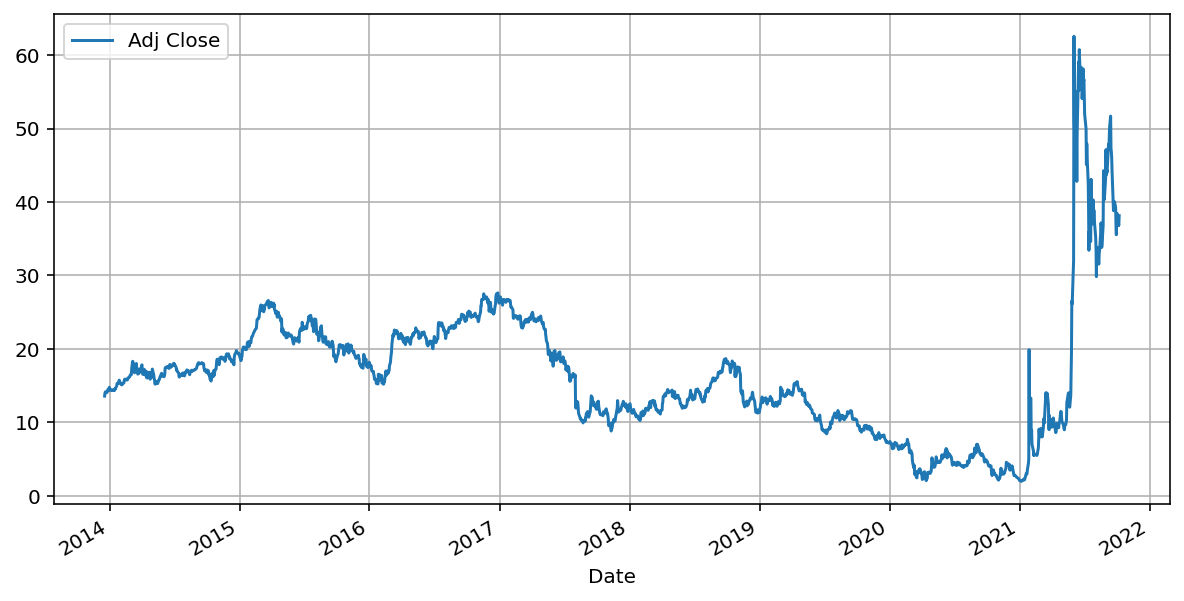

In [6]:
# Plot the AMC price from start to end
AMC.plot(y = 'Adj Close',figsize=(10,5), grid = True);

### Simple Moving Average

The Simple Moving Average is calculated using both the `rolling()` and `mean()` methods.

In [7]:
# Computing the 3-Day Simple Moving Average
AMC['Adj Close'].rolling(3).mean().head(3)

Date
2013-12-18          NaN
2013-12-19          NaN
2013-12-20    13.921858
Name: Adj Close, dtype: float64

In [8]:
# Computing the 20-Day Simple Moving Standard Deviation
AMC['Adj Close'].rolling(20).std().head(20)

Date
2013-12-18         NaN
2013-12-19         NaN
2013-12-20         NaN
2013-12-23         NaN
2013-12-24         NaN
2013-12-26         NaN
2013-12-27         NaN
2013-12-30         NaN
2013-12-31         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08         NaN
2014-01-09         NaN
2014-01-10         NaN
2014-01-13         NaN
2014-01-14         NaN
2014-01-15         NaN
2014-01-16    0.248012
Name: Adj Close, dtype: float64

In [9]:
# Computing the 30-Day and 200-Day Simple Moving Averages
AMC['30D_Mean'] = AMC['Adj Close'].rolling(30).mean()
AMC['200D_Mean'] = AMC['Adj Close'].rolling(200).mean()

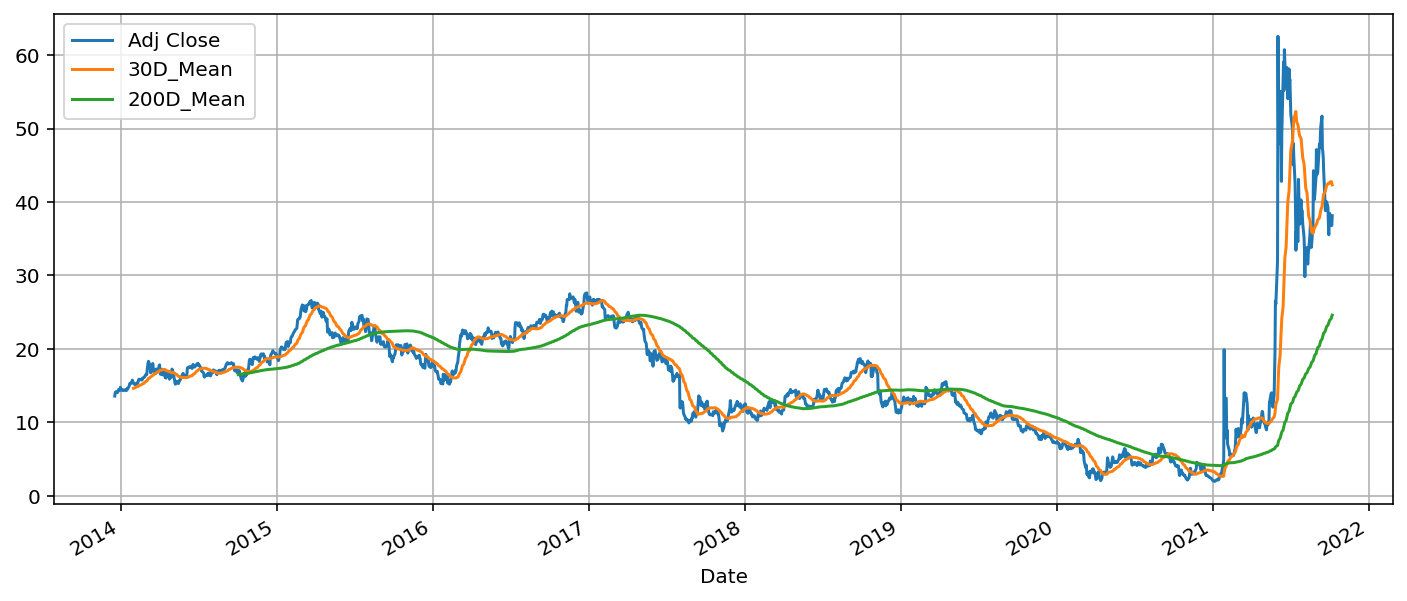

In [27]:
#When the shorter-term MA crosses above the longer-term MA, it's a buy signal, as it indicates that the trend is shifting up. This is known as a "golden cross."
#Meanwhile, when the shorter-term MA crosses below the longer-term MA, it's a sell signal, as it indicates that the trend is shifting down. This is known as a "dead/death cross."

AMC.plot(y = ['Adj Close','30D_Mean','200D_Mean'],
           figsize=(12,5), grid = True);

### Bollinger Bands

 Bollinger Bands are volatility bands around a moving average.

In [11]:
AMC['Upper_BBand'] = AMC['30D_Mean'] + 2*AMC['Adj Close'].rolling(30).std()
AMC['Lower_BBand'] = AMC['30D_Mean'] - 2*AMC['Adj Close'].rolling(30).std()

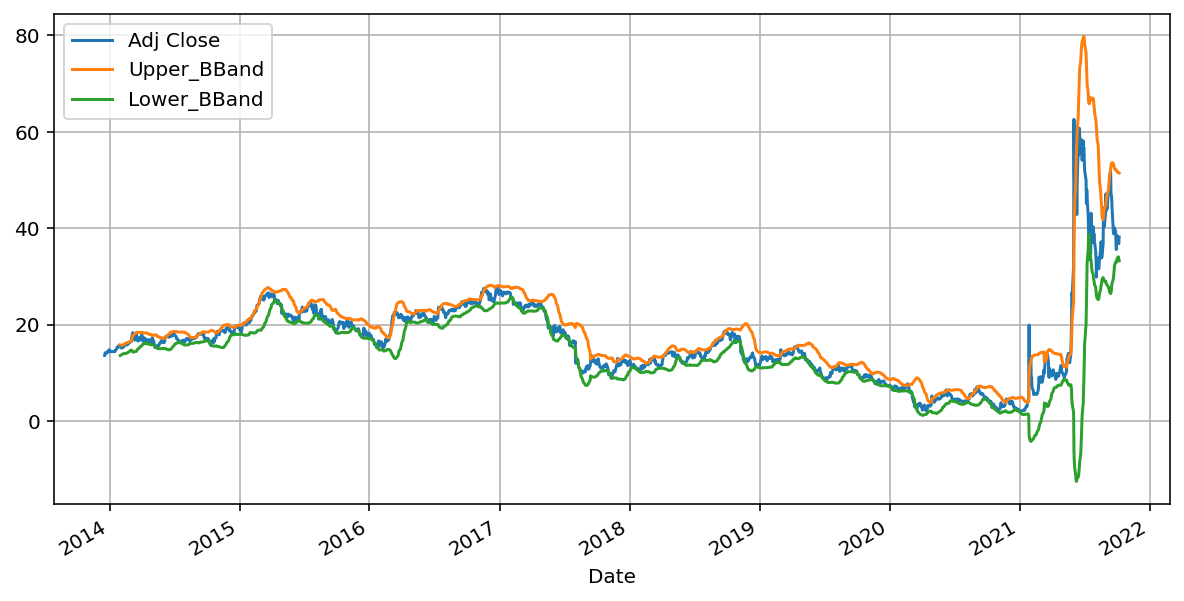

In [12]:
AMC.plot(y = ['Adj Close','Upper_BBand','Lower_BBand'],
          figsize=(10,5), grid = True);

### Simple Moving Average Algorithmic Trading Strategy

Go long (Buy or +1) the asset when the short window MA (SMA) is higher than the long window MA (LMA), and Go Short (Sell or -1) otherwise 

In [13]:
AMCv2 = AMC[['Adj Close', 'RET']].copy()
AMCv2.head()

,Adj Close,RET
Date,,
2013-12-18,13.593410,NaN
2013-12-19,14.017756,0.030740
2013-12-20,14.154409,0.009701
2013-12-23,14.197564,0.003044
2013-12-24,14.046525,-0.010695


In [14]:
SMA = 30
LMA = 200
AMCv2['SMA']=AMCv2['Adj Close'].rolling(SMA).mean()
AMCv2['LMA']=AMCv2['Adj Close'].rolling(LMA).mean()
AMCv2.dropna(inplace=True)
AMCv2.head()

,Adj Close,RET,SMA,LMA
Date,,,,
2014-10-03,17.130848,0.009011,17.514945,16.509369
2014-10-06,16.991808,-0.008149,17.513146,16.526361
2014-10-07,16.442978,-0.032833,17.491117,16.538487
2014-10-08,16.552744,0.006653,17.471780,16.550479
2014-10-09,16.318573,-0.014248,17.443185,16.561084


In [15]:
#Method 1
AMCv2.loc[AMCv2['SMA']>AMCv2['LMA'],'Position']= 1
AMCv2.loc[AMCv2['SMA']<=AMCv2['LMA'],'Position']= -1

In [16]:
#Method 2
AMCv2['Trading Decision2']= np.where(AMCv2['SMA']>AMCv2['LMA'],1,-1)

In [17]:
AMCv2.tail()

,Adj Close,RET,SMA,LMA,Position,Trading Decision2
Date,,,,,,
2021-10-01,38.459999,0.010455,42.687334,23.91260,1.0,1
2021-10-04,36.770000,-0.044936,42.766000,24.08255,1.0,1
2021-10-05,37.060001,0.007856,42.775334,24.25360,1.0,1
2021-10-06,36.830002,-0.006225,42.527667,24.42375,1.0,1
2021-10-07,38.139999,0.034951,42.333667,24.60105,1.0,1


In [18]:
AMCv2['Strategy']=AMCv2['Position'].shift(1)*AMCv2['RET']
AMCv2.dropna(inplace=True)

In [19]:
AMCv2['C_RET']=AMCv2['RET'].cumsum()
AMCv2['C_Strategy']=AMCv2['Strategy'].cumsum()

In [20]:
AMCv2.head()

,Adj Close,RET,SMA,LMA,Position,Trading Decision2,Strategy,C_RET,C_Strategy
Date,,,,,,,,,
2014-10-06,16.991808,-0.008149,17.513146,16.526361,1.0,1,-0.008149,-0.008149,-0.008149
2014-10-07,16.442978,-0.032833,17.491117,16.538487,1.0,1,-0.032833,-0.040982,-0.040982
2014-10-08,16.552744,0.006653,17.471780,16.550479,1.0,1,0.006653,-0.034329,-0.034329
2014-10-09,16.318573,-0.014248,17.443185,16.561084,1.0,1,-0.014248,-0.048577,-0.048577
2014-10-10,15.923418,-0.024513,17.402145,16.570468,1.0,1,-0.024513,-0.073090,-0.073090


In [21]:
AMCv2[['C_RET','C_Strategy']].tail(1)

,C_RET,C_Strategy
Date,,
2021-10-07,0.800383,1.100553


In [22]:
AMCv2[['RET','Strategy']].std()*250**0.5

RET         1.044918
Strategy    1.044896
dtype: float64

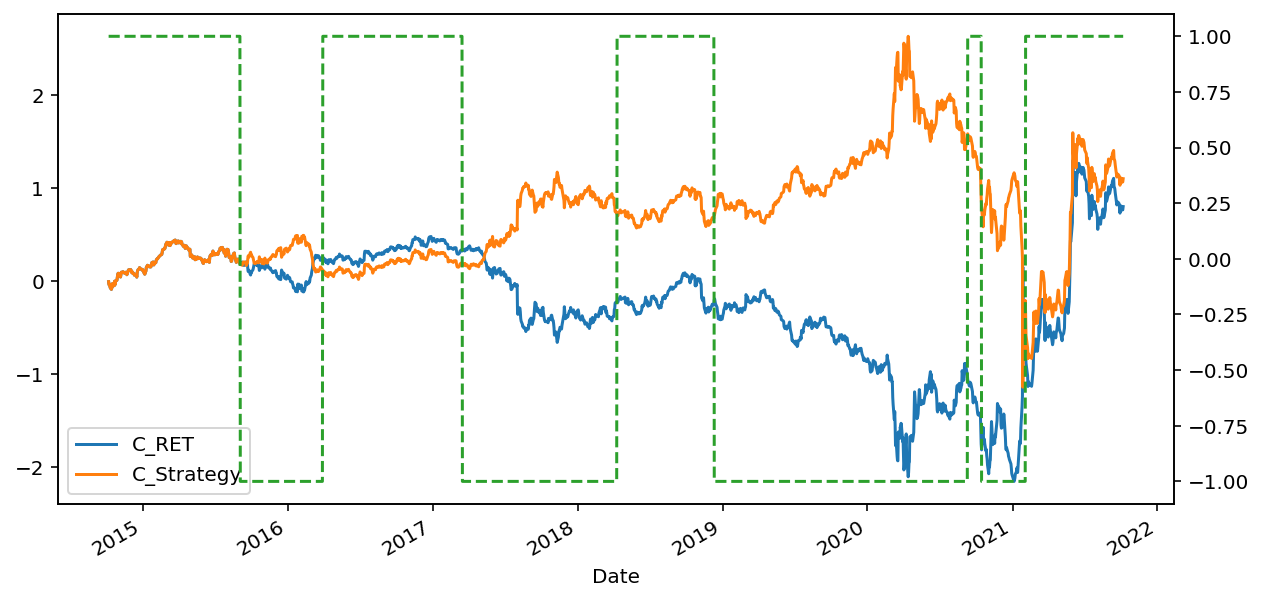

In [23]:
ax = AMCv2.plot(y = ['C_RET','C_Strategy'],
             figsize=(10,5), grid = True)
AMCv2['Position'].plot(ax=ax,secondary_y='Position',style='--')
ax.legend(loc='lower left');